# Data Understanding
In order to get a better understanding of the busiest times in seattle,  we will take a look at the dataset.

## Access & Explore
First, let's read and explore the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Import Calendar dataset
df_cal=pd.read_csv('calendar.csv', thousands=',')
pd.set_option("display.max_columns", None)
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [15]:
#Check if any empty records for the price
df_cal['price'].isnull().value_counts()

False    934542
True     459028
Name: price, dtype: int64

# Data Preparation & Analysis
Now we will prepare the data and make some convertions to prepare the data for visualization

## Wrangle and Clean

In [16]:
#Convert price to numerical value
df_cal["price"] = df_cal["price"].str.replace('[$,,,]',"").astype(float)

<ipython-input-16-61781eef3286>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cal["price"] = df_cal["price"].str.replace('[$,,,]',"").astype(float)


In [17]:
#Impute the missing data of price columns with mean
df_cal['price'].fillna((df_cal['price'].mean()), inplace=True)

In [18]:
#Create new feature represent the month of a year
df_cal['month'] = pd.DatetimeIndex(df_cal['date']).month
df_cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.000000,1
1,241032,2016-01-05,t,85.000000,1
2,241032,2016-01-06,f,137.944859,1
3,241032,2016-01-07,f,137.944859,1
4,241032,2016-01-08,f,137.944859,1


## Data Visualization
Now we will visualize our dataset to get the required answer for the main question that which time is the busiest in seattle all over the year and its reflection on price

<AxesSubplot:title={'center':'BusyTime'}, xlabel='month'>

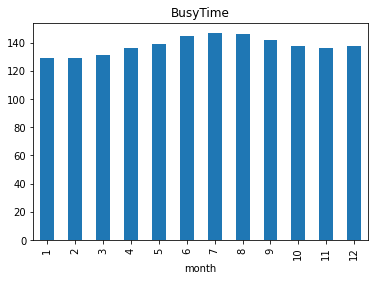

In [19]:
#Plot the busiest seattle time of the year
busytime=df_cal.groupby(['month']).price.mean()
busytime.plot(kind = 'bar', title="BusyTime")

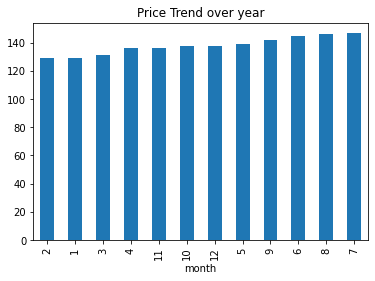

In [12]:
#Plot the price range accross the year
busytime_price=df_cal.groupby(['month']).mean()['price'].sort_values().dropna()
busytime_price.plot(kind="bar");
plt.title("Price Trend over year");

# Conclusion

July, August and June are the busiest time of the year and this reflects proportionally in booking prices